# Matplotlib

## Overview

### Notes
* Matplotlib là thư viện dùng để tạo các biểu đồ tĩnh, hoạt hình ... trong Python
* Matplotlib bao gồm biểu đồ đường, cột, phân tán, histogram và biểu đồ tròn, cùng với nhiều loại khác có sẵn
* Matplotlib rất linh hoạt và có thể được sử dụng để tạo các biểu đồ phức tạp bằng cách chồng các phần tử lên nhau.
* **Matplotlib rất quan trọng trong phân tích dữ liệu, cung cấp một cách để trực quan hóa dữ liệu và các thông tin dưới dạng đồ họa**
* Hỗ trợ nhiều loại biểu đồ và đồ thị, bao gồm các biểu đồ 3D và đồ thị tương tác để phân tích sâu hơn

In [37]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

### Biểu đồ đường

### Notes:

* `plot()` được sử dụng để vẽ các điểm trên biểu đồ.
* Hàm này nhận các tham số để chỉ định các điểm trong biểu đồ.
  * Tham số đầu tiên là *trục x*.
  * Tham số thứ hai là *trục y*.
  * Cú pháp: `plt.plot(trục x, trục y)`.
* Dùng để hiển thị thông tin dưới dạng các điểm dữ liệu gọi là 'markers' được nối với nhau bằng các đoạn thẳng.

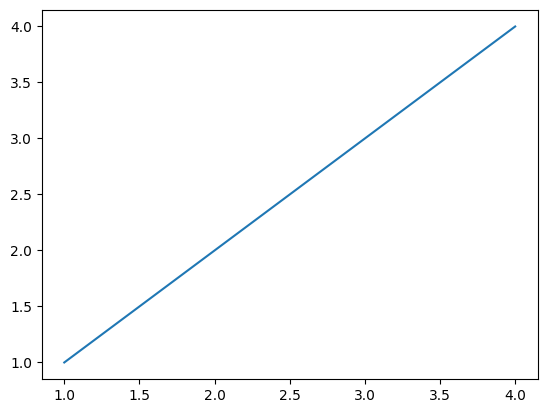

In [38]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)

Dùng `plt.show()` để xóa `[<matplotlib.lines.Line2D at 0x1df8ae965d0>]`

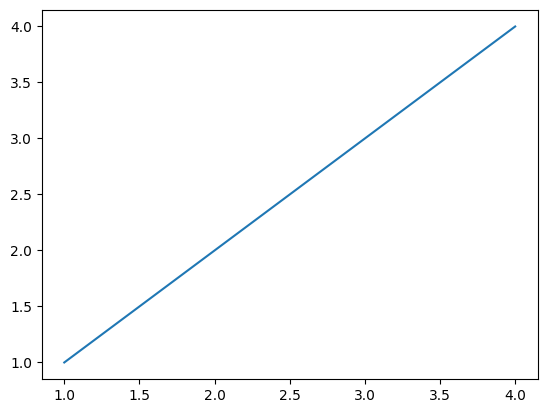

In [39]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)
plt.show()

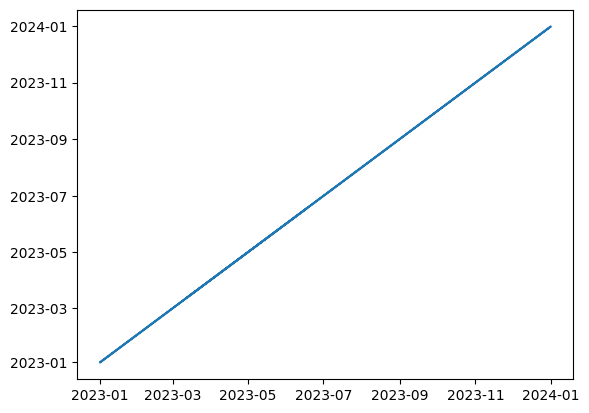

In [40]:
plt.plot(df['job_posted_date'], df['job_posted_date'])
plt.show()

`data=df` giúp đảm bảo rằng matplotlib sẽ biết tìm các cột này trong DataFrame df

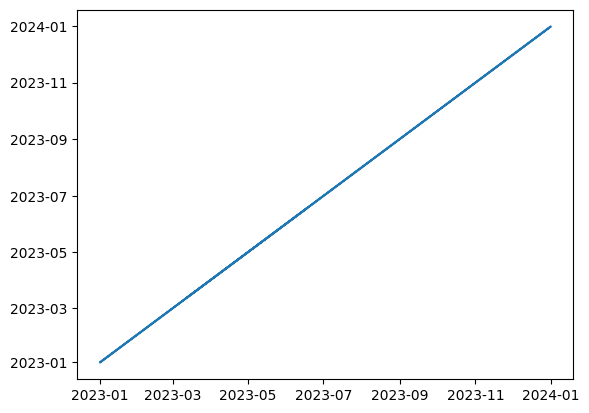

In [41]:
plt.plot('job_posted_date', 'job_posted_date', data=df)
plt.show()

In [42]:
date_counts = df['job_posted_date'].value_counts()

# Xếp tăng dần
date_counts = date_counts.sort_index()

date_counts

job_posted_date
2023-01-01 00:00:04    1
2023-01-01 00:00:07    1
2023-01-01 00:00:22    1
2023-01-01 00:00:24    1
2023-01-01 00:00:27    1
                      ..
2023-12-31 23:40:18    2
2023-12-31 23:40:22    2
2023-12-31 23:40:31    2
2023-12-31 23:40:32    1
2023-12-31 23:59:58    2
Name: count, Length: 607192, dtype: int64

### NOTE 

* `Series` khác với `DataFrame`


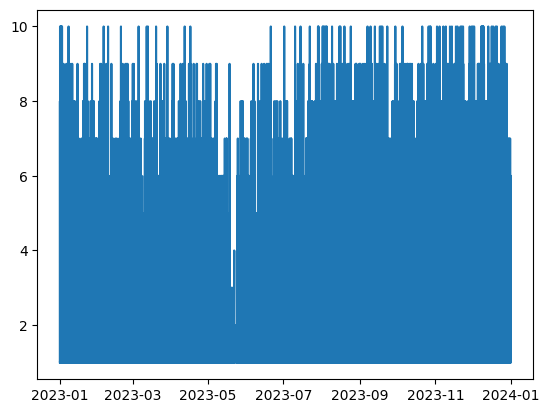

In [43]:
plt.plot(date_counts.index, date_counts)
plt.show()

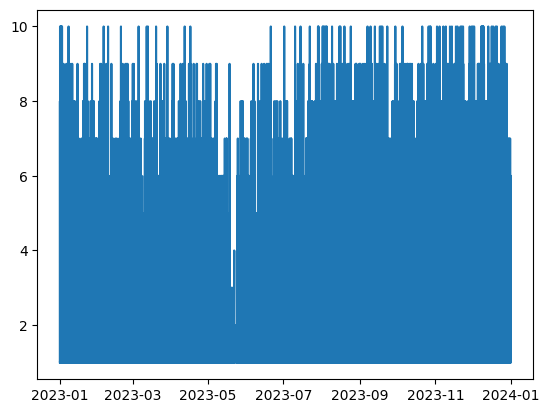

In [44]:
plt.plot(date_counts.index, date_counts.values)
plt.show()

In [45]:
df['job_posted_month'] = df['job_posted_date'].dt.month

monthly_counts = df['job_posted_month'].value_counts()

monthly_counts = monthly_counts.sort_index()

monthly_counts 

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

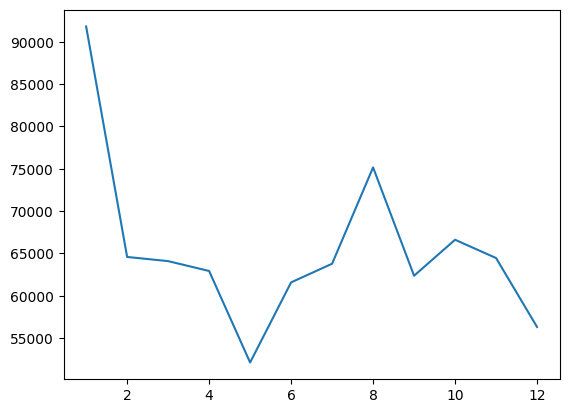

In [46]:
plt.plot(monthly_counts.index, monthly_counts)

| Đặc điểm            | **Series**                                         | **DataFrame**                                      |
|---------------------|----------------------------------------------------|---------------------------------------------------|
| **Cấu trúc**        | Mảng một chiều (1D array)                         | Bảng hai chiều (2D table)                         |
| **Kiểu dữ liệu**    | Chứa dữ liệu của một loại duy nhất                | Có thể chứa nhiều loại dữ liệu khác nhau         |
| **Chỉ mục**         | Chỉ mục là một mảng một chiều (có thể là số, chuỗi, ngày tháng, v.v.) | Chỉ mục là một mảng hai chiều (cả chỉ mục hàng và cột) |
| **Kích thước**      | Chỉ có một cột                                    | Có thể chứa nhiều cột                            |
| **Dữ liệu**         | Dữ liệu có thể là bất kỳ loại dữ liệu nào (int, float, string, v.v.) nhưng phải đồng nhất trong toàn bộ Series | Dữ liệu có thể là các kiểu dữ liệu khác nhau giữa các cột |
| **Tạo từ**          | Tạo từ danh sách, mảng NumPy, hoặc từ điển         | Tạo từ danh sách các Series, từ điển, hoặc mảng 2D |
| **Sử dụng**         | Thường được dùng cho dữ liệu một cột               | Thường được dùng cho dữ liệu dạng bảng với nhiều cột |


In [47]:
# Tạo 1 series từ 1 list
data = [10, 20, 30, 40, 50]
series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])

series.values

array([10, 20, 30, 40, 50])

In [48]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## Biểu đồ cột

### Notes:

* Dùng để so sánh các nhóm khác nhau hoặc theo dõi sự thay đổi theo thời gian
* Trong Python, chúng ta có hai loại biểu đồ cột:
    1. Biểu đồ cột
    2. Biểu đồ cột ngang


### Biểu đồ cột dọc

#### Ghi chú

* `plt.bar()`: Vẽbiểu đồ cột dọc
* Cú pháp: `plt.bar(categories, values)`
* Các thanh cột là dọc

In [49]:
job_counts = df['job_title_short'].value_counts()

job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

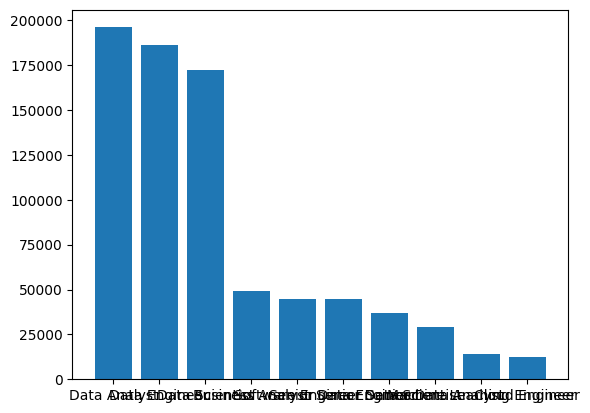

In [50]:
plt.bar(job_counts.index, job_counts.values)
plt.show()

Khi chưa chỉnh thì nó sẽ rất khó nhìn

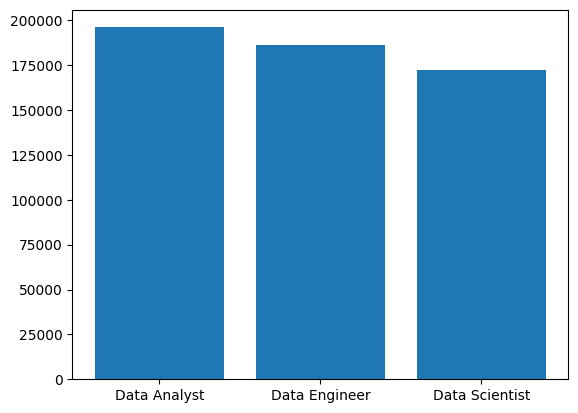

In [51]:
job_counts = df['job_title_short'].value_counts().head(3) 

plt.bar(job_counts.index, job_counts.values) 
plt.show() 

### Biểu đồ cột ngang

#### Notes

* Cú pháp: `plt.barh(categories, values)`
* Tốt cho việc so sánh kích thước của các danh mục hoặc khi nhãn văn bản quá dài để hiển thị tốt dưới biểu đồ cột đứng.

#### Ví dụ:

In [52]:
# Dếm lần xuất hiện 
job_counts = df['job_title_short'].value_counts()

# Hiện thị 6 giá trị đầu
job_counts = job_counts.head(6)

# Xếp tăng dần
job_counts = job_counts.sort_values(ascending=True)

job_counts

job_title_short
Senior Data Engineer     44563
Software Engineer        44929
Business Analyst         49063
Data Scientist          172286
Data Engineer           186241
Data Analyst            196075
Name: count, dtype: int64

cách viết dễ đọc hơn là dùng `( )` để nối các phương thức lại với nhau

In [53]:
job_counts = (
    df['job_title_short']
    .value_counts()
    .head(6)
    .sort_values(ascending=True)
)

job_counts

job_title_short
Senior Data Engineer     44563
Software Engineer        44929
Business Analyst         49063
Data Scientist          172286
Data Engineer           186241
Data Analyst            196075
Name: count, dtype: int64

`.index` giúp lấy tên các mục (nhãn) từ Series để làm nhãn hiển thị trên trục y.

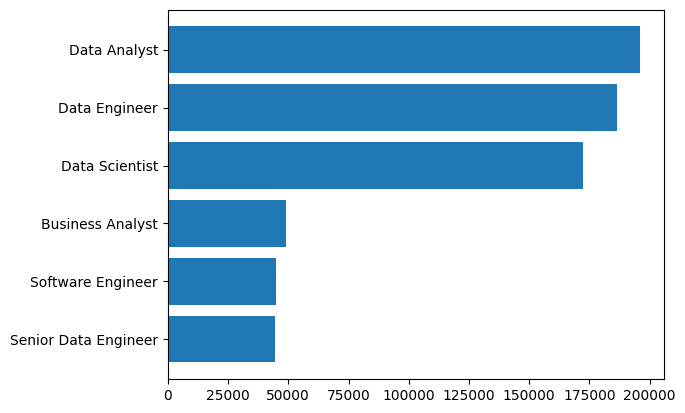

In [54]:
plt.barh(job_counts.index, job_counts)
plt.show()

# Cách thêm nhăn vào biểu đồ

## Notes:

* `title()`: Đặt tiêu đề cho biểu đồ
* `xlabel()`: Đặt nhãn cho trục x
* `ylabel()`: Đặt nhãn cho trục y
* `xticks()`: Tùy chỉnh trục x
    * `rotation`: Xoay nhãn theo số độ X, ví dụ: `plt.xticks(rotation=35)` để xoay nhãn trục x 35 độ
* `yticks()`: Tùy chỉnh trục y

### Ví dụ:


In [55]:
job_counts = df['job_title_short'].value_counts()

job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

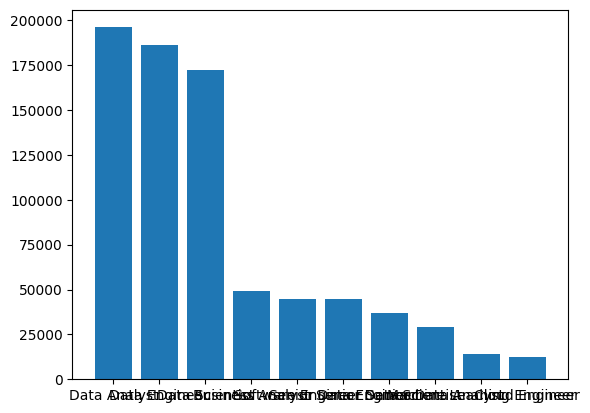

In [56]:
plt.bar(job_counts.index, job_counts) 
plt.show()

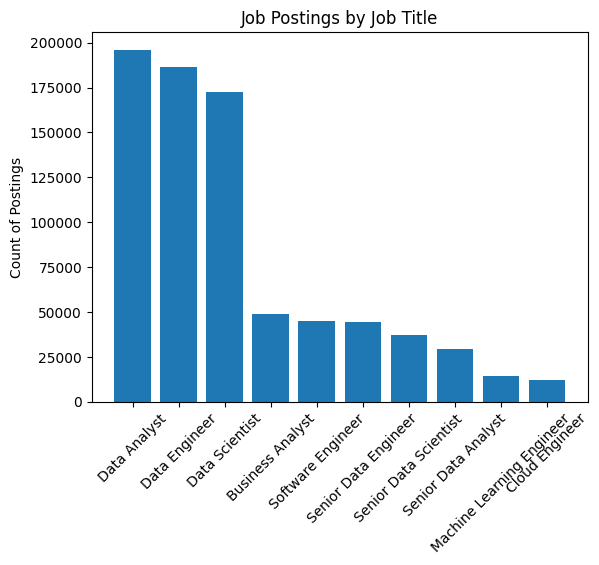

In [57]:
# Tạo biểu đồ cột
plt.bar(job_counts.index, job_counts) 

# Tiêu đề cọt y
plt.ylabel('Count of Postings')

# Tên biểu đồ
plt.title('Job Postings by Job Title')

# các tên của Trục x chéo 45
plt.xticks(rotation=45) 

plt.show()

- `ha='right'`: Căn chỉnh mép phải của nhãn với dấu gạch đứng 
- `va='top'`: Điều chỉnh căn chỉnh dọc để giữ văn bản phía trên dấu gạch đứng và ngăn chồng lấn với trục x.

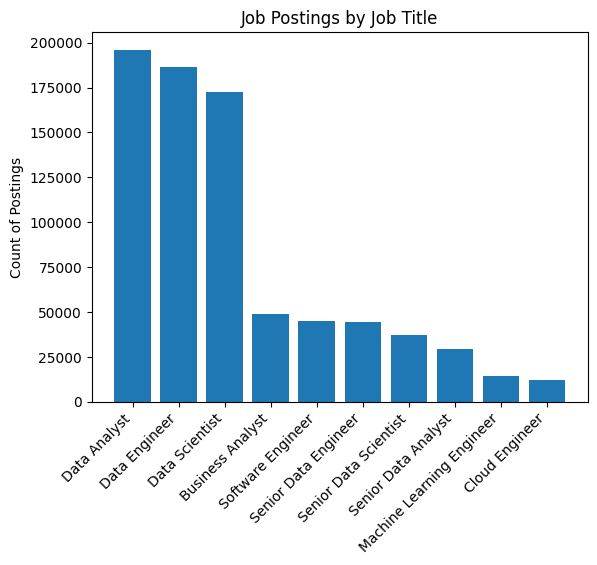

In [58]:
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=45, va='top')

plt.show()

# Vẽ biểu đồ bằng thư viện pandas


In [59]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

1. Vẽ từ một `series`

In [60]:
job_counts = df['job_title_short'].value_counts()

job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

Biểu đồ cột

vẽ bằng thư viện `matploting`

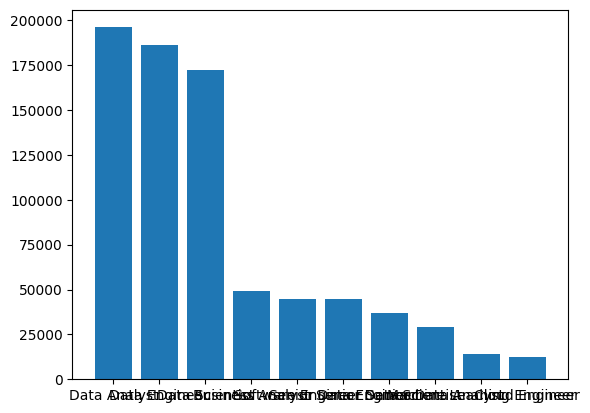

In [61]:
plt.bar(job_counts.index, job_counts) 
plt.show()

Khi dùng `pandas` để vẽ:
* `.plot()` trong Pandas dùng để vẽ đồ thị từ dữ liệu trong một Series hoặc DataFrame
    * `kind ='bar'` biểu đồ cột dọc

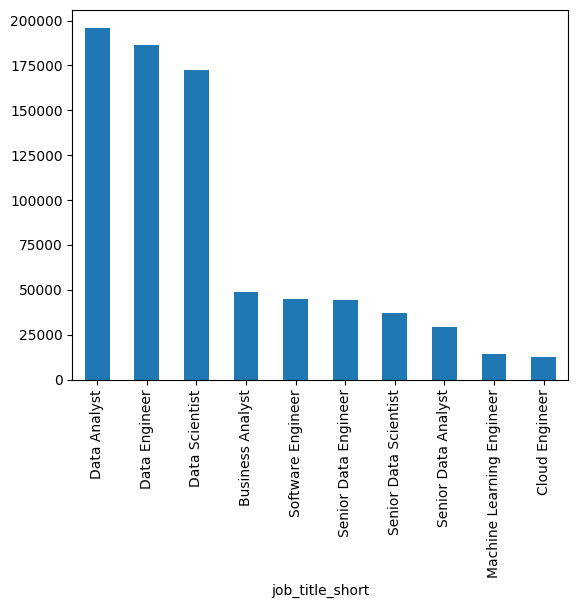

In [62]:
job_counts.plot(kind='bar')
plt.show()

Khi dùng pandas để vẽ biểu đồ thì Có thể chỉnh sửa giống như dùng trên Matplooting

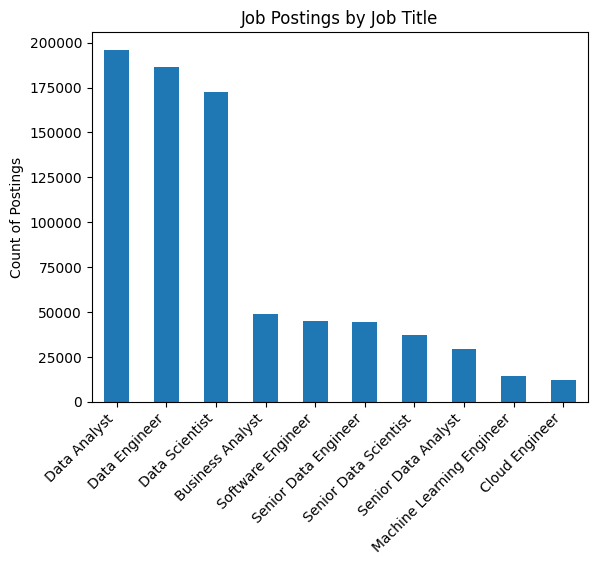

In [63]:
job_counts.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right') 
plt.show()

2. Vẽ từ `DataFrame`

* Cú pháp `df.plot(x='Column_name', y='Row_name', kind='Ploting_name')`

    * `df.plot()`: Vẽ biểu đồ trên pandas
    * `x='Column_name'`: dữ liệu của trục hoành
    * `y='Row_name'`: dữ liệu trục tung
    * `kind='ploting_name'`: kiểu biểu đồ

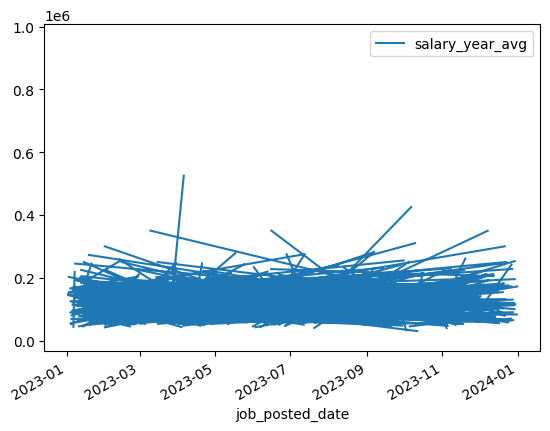

In [64]:
df.plot(x='job_posted_date', y='salary_year_avg', kind='line') # line: biểu đồ đường
plt.show()

Do dữ liệu DataFrame này quá lớn nên dường rất khó nhìn

In [65]:
df = df.set_index('job_posted_date')
df.sort_index(inplace=True)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_posted_date,,,,,,,,,,,,,,,,
2023-01-01 00:00:04,Data Analyst,Data Analyst,"New York, NY",via CareerBuilder,Full-time,False,"New York, United States",False,False,United States,None,NaN,NaN,Metasys Technologies,"['sql', 'snowflake', 'visio', 'jira', 'conflue...","{'analyst_tools': ['visio'], 'async': ['jira',..."
2023-01-01 00:00:07,Data Analyst,Data Analyst,"Bloomfield, CT",via CareerBuilder,Full-time,False,"New York, United States",True,False,United States,None,NaN,NaN,Diverse Lynx,"['sql', 'sas', 'sas']","{'analyst_tools': ['sas'], 'programming': ['sq..."
2023-01-01 00:00:22,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",False,True,United States,None,NaN,NaN,Guidehouse,"['sql', 'python', 'r', 'azure', 'snowflake', '...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."
2023-01-01 00:00:24,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",False,False,United States,None,NaN,NaN,Protask,"['sql', 'jira']","{'async': ['jira'], 'programming': ['sql']}"
2023-01-01 00:00:27,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",False,True,United States,None,NaN,NaN,Atria Wealth Solutions,"['sql', 'atlassian', 'jira']","{'async': ['jira'], 'other': ['atlassian'], 'p..."


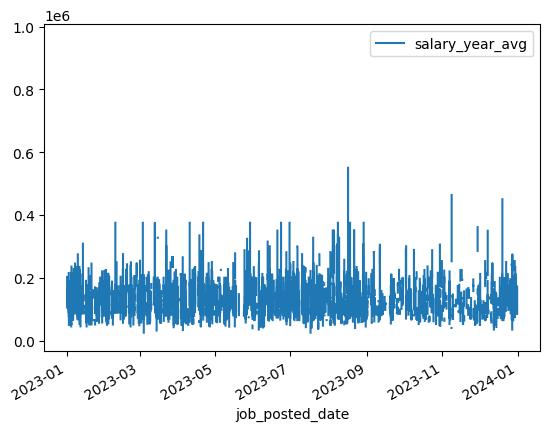

In [66]:
df.plot(y='salary_year_avg', kind='line')
plt.show()